Chapter 19
# 将成对亲近度矩阵转化为完全图，设定阈值
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 12个坐标点
points = np.array([[1,6],[4,6],[1,5],[6,0],
                   [3,8],[8,3],[4,1],[3,5],
                   [9,2],[5,9],[4,9],[8,4]])

In [3]:
# 自定义高斯核函数
def gaussian_kernel(distance, sigma=1.0):
    return np.exp(- (distance ** 2) / (2 * sigma ** 2))

In [4]:
# 计算成对距离矩阵
D = np.linalg.norm(points[:, np.newaxis, :] - points, axis=2)

In [5]:
K = gaussian_kernel(D,3)
# 参数sigma设为3

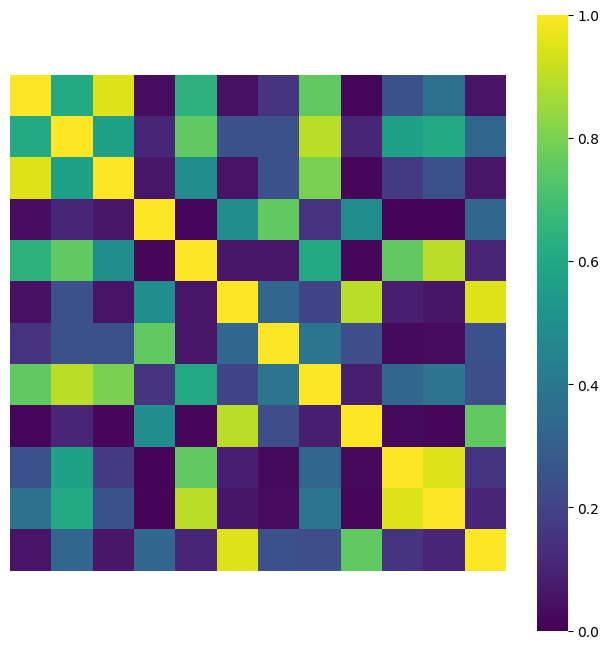

In [6]:
# 可视化亲近度矩阵
plt.figure(figsize=(8,8))
sns.heatmap(K, square = True, 
            cmap = 'viridis', vmin = 0, vmax = 1,
            # annot=True, fmt=".3f",
            xticklabels = [], yticklabels = [])
plt.savefig('亲近度矩阵_heatmap.svg')

In [7]:
np.fill_diagonal(K, 0)
# 将对角线元素置0，不画自环

# 创建无向图
G = nx.Graph(K, nodetype=int)
# 用邻接矩阵创建无向图

# 添加节点和边
for i in range(12):
    G.add_node(i, pos=(points[i, 0], points[i, 1]))  

# 取出节点位置
pos = nx.get_node_attributes(G, 'pos')

# 增加节点属性
node_labels = {i: chr(ord('a') + i) for i in range(len(G.nodes))} 
edge_weights = [G[i][j]['weight'] for i, j in G.edges]
edge_labels = {(i, j): f'{K[i, j]:.2f}' for i, j in G.edges}

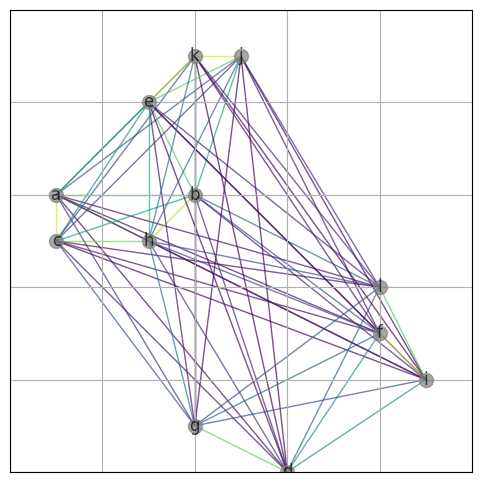

In [13]:
# 可视化图
fig, ax = plt.subplots(figsize = (6,6))
nx.draw_networkx(G, pos, 
                 with_labels=True, 
                 labels=node_labels, 
                 node_size=100, 
                 edge_vmin = 0, edge_vmax = 1,
                 node_color='grey', 
                 font_color='black', 
                 edge_color=edge_weights,
                 edge_cmap=plt.cm.viridis,
                 width=1, alpha=0.7)

ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.savefig('亲近度矩阵_无向图.svg')
plt.show()


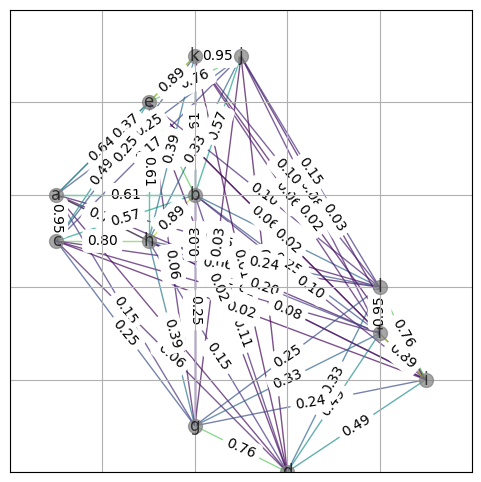

In [12]:
# 可视化图
fig, ax = plt.subplots(figsize = (6,6))
nx.draw_networkx(G, pos, 
                 with_labels=True, 
                 labels=node_labels, 
                 node_size=100, 
                 edge_vmin = 0, edge_vmax = 1,
                 node_color='grey', 
                 font_color='black', 
                 edge_color=edge_weights,
                 edge_cmap=plt.cm.viridis,
                 width=1, alpha=0.7)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=edge_labels, 
                             font_color='k')

ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.show()


In [28]:
# 设定高斯核阈值
threshold = 0.4
K_threshold = np.copy(K)
# 副本，非视图
K_threshold[K_threshold < threshold] = 0
# 低于阈值置零，改为小于号

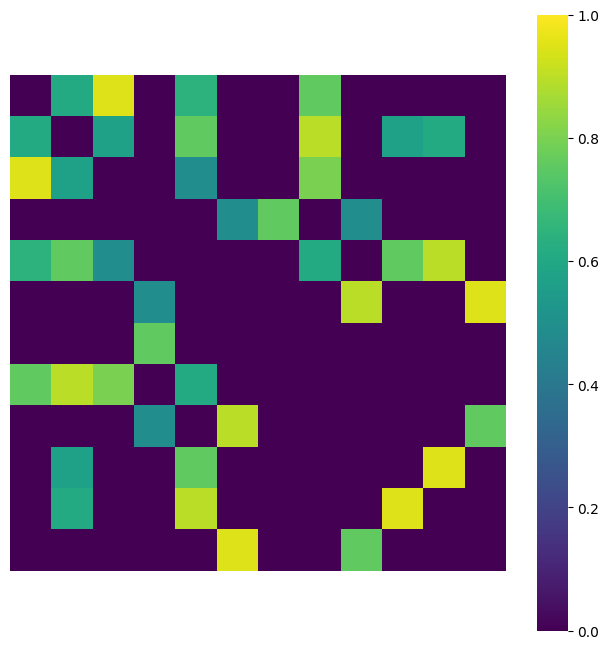

In [29]:
# 可视化成对距离矩阵
plt.figure(figsize=(8,8))
sns.heatmap(K_threshold, square = True, 
            cmap = 'viridis', vmin = 0, vmax = 1,
            # annot=True, fmt=".3f",
            xticklabels = [], yticklabels = [])
plt.savefig('亲近度矩阵_heatmap, 设置阈值.svg')

In [30]:
# 创建无向图
G_threshold = nx.Graph(K_threshold, nodetype=int)
# 用邻接矩阵创建无向图

# 添加节点和边
for i in range(12):
    G_threshold.add_node(i, pos=(points[i, 0], points[i, 1]))  

# 取出节点位置
pos = nx.get_node_attributes(G_threshold, 'pos')

# 增加节点属性
node_labels = {i: chr(ord('a') + i) for i in range(len(G_threshold.nodes))} 
edge_weights = [G_threshold[i][j]['weight'] for i, j in G_threshold.edges]
edge_labels = {(i, j): f'{K_threshold[i, j]:.2f}' for i, j in G_threshold.edges}

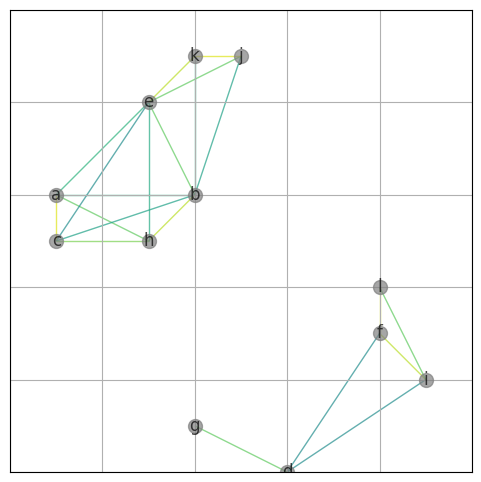

In [31]:
# 可视化图
fig, ax = plt.subplots(figsize = (6,6))
nx.draw_networkx(G_threshold, pos, 
                 with_labels=True, 
                 labels=node_labels, 
                 node_size=100, 
                 edge_vmin = 0, edge_vmax = 1,
                 node_color='grey', 
                 font_color='black', 
                 edge_color=edge_weights,
                 edge_cmap=plt.cm.viridis,
                 width=1, alpha=0.7)

ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.savefig('亲近度矩阵_无向图, 设置阈值.svg')
plt.show()
